# Data Mining Project Startups

# Biel Cantera

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('../datasets/startup_traction.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 669 to 684
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     700 non-null    object 
 1   country                  700 non-null    object 
 2   city                     700 non-null    object 
 3   web                      649 non-null    object 
 4   PIC                      700 non-null    int64  
 5   stage_order              700 non-null    int64  
 6   stage_name               700 non-null    object 
 7   tweet_count              309 non-null    float64
 8   tweet_length             309 non-null    float64
 9   tweet_rate               309 non-null    float64
 10  original_ratio           307 non-null    float64
 11  retweeted_ratio          289 non-null    float64
 12  replied_to_ratio         243 non-null    float64
 13  quoted_ratio             259 non-null    float64
 14  quoted_replied_to_ratio  18 n

In [3]:
df.head()

,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,1.121693,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0
1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,0.049901,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0


In [4]:
df.columns

Index(['name', 'country', 'city', 'web', 'PIC', 'stage_order', 'stage_name',
       'tweet_count', 'tweet_length', 'tweet_rate', 'original_ratio',
       'retweeted_ratio', 'replied_to_ratio', 'quoted_ratio',
       'quoted_replied_to_ratio', 'retweet_count', 'retweet_ratio',
       'retweet_rate', 'reply_count', 'reply_ratio', 'reply_rate',
       'like_count', 'like_rate', 'like_ratio', 'quote_count', 'quote_rate',
       'quote_ratio', 'engagement_ratio', 'stage_success'],
      dtype='object')

In [5]:
df.shape

(700, 29)

In [6]:
df.dtypes

name                        object
country                     object
city                        object
web                         object
PIC                          int64
stage_order                  int64
stage_name                  object
tweet_count                float64
tweet_length               float64
tweet_rate                 float64
original_ratio             float64
retweeted_ratio            float64
replied_to_ratio           float64
quoted_ratio               float64
quoted_replied_to_ratio    float64
retweet_count              float64
retweet_ratio              float64
retweet_rate               float64
reply_count                float64
reply_ratio                float64
reply_rate                 float64
like_count                 float64
like_rate                  float64
like_ratio                 float64
quote_count                float64
quote_rate                 float64
quote_ratio                float64
engagement_ratio           float64
stage_success       

In [7]:
df.isna().sum()

name                         0
country                      0
city                         0
web                         51
PIC                          0
stage_order                  0
stage_name                   0
tweet_count                391
tweet_length               391
tweet_rate                 391
original_ratio             393
retweeted_ratio            411
replied_to_ratio           457
quoted_ratio               441
quoted_replied_to_ratio    682
retweet_count              391
retweet_ratio              391
retweet_rate               391
reply_count                391
reply_ratio                391
reply_rate                 391
like_count                 391
like_rate                  391
like_ratio                 391
quote_count                391
quote_rate                 391
quote_ratio                391
engagement_ratio           391
stage_success                0
dtype: int64

In [8]:
df[df.select_dtypes(include=['int64', 'float64']).columns] = df.select_dtypes(include=['int64', 'float64']).fillna(0)
df

,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,1.121693,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0
1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,0.049901,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1653,Z.E.U. -INMUNOTEC SL,SPAIN,ZARAGOZA,http://www.zeulab.com,973030184,1,INCEPTION,72.0,178.513889,0.098361,...,0.000000,0.000000,98.0,0.133880,1.361111,98.0,0.133880,1.361111,1.944444,0
559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0


In [9]:
df['has_web'] = df['web'].notna().astype(int)
df

,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,...,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success,has_web
669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0
1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,1.121693,...,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0,1
1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,0.049901,...,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,SWEGAN AB,SWEDEN,LINKOPING,http://www.swegan.se,923998527,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,http://www.milkways.com,935402623,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
1653,Z.E.U. -INMUNOTEC SL,SPAIN,ZARAGOZA,http://www.zeulab.com,973030184,1,INCEPTION,72.0,178.513889,0.098361,...,0.000000,98.0,0.133880,1.361111,98.0,0.133880,1.361111,1.944444,0,1
559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,NaN,914997509,1,INCEPTION,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0


In [10]:
df.dtypes

name                        object
country                     object
city                        object
web                         object
PIC                          int64
stage_order                  int64
stage_name                  object
tweet_count                float64
tweet_length               float64
tweet_rate                 float64
original_ratio             float64
retweeted_ratio            float64
replied_to_ratio           float64
quoted_ratio               float64
quoted_replied_to_ratio    float64
retweet_count              float64
retweet_ratio              float64
retweet_rate               float64
reply_count                float64
reply_ratio                float64
reply_rate                 float64
like_count                 float64
like_rate                  float64
like_ratio                 float64
quote_count                float64
quote_rate                 float64
quote_ratio                float64
engagement_ratio           float64
stage_success       

In [11]:
df.drop('web', axis=1, inplace=True)
df

,name,country,city,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,original_ratio,...,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success,has_web
669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,917744355,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0
1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,935677812,1,INCEPTION,636.0,170.550314,1.121693,0.630503,...,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0,1
1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,971995582,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
331,CROIVALVE LIMITED,IRELAND,DUBLIN,909573463,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
614,OU COGNUSE,ESTONIA,TALLINN,916757671,1,INCEPTION,126.0,137.015873,0.049901,0.428571,...,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,SWEGAN AB,SWEDEN,LINKOPING,923998527,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
1216,MILKWAYS HOLDING BV,NETHERLANDS,HATTEM,935402623,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,1
1653,Z.E.U. -INMUNOTEC SL,SPAIN,ZARAGOZA,973030184,1,INCEPTION,72.0,178.513889,0.098361,0.944444,...,0.000000,98.0,0.133880,1.361111,98.0,0.133880,1.361111,1.944444,0,1
559,MILLOR ENERGY SOLUTIONS SL,SPAIN,TERRASSA,914997509,1,INCEPTION,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0


### encoding categorical variables

In [39]:
unique_stage_names = df['stage_name'].unique()
print(f"Unique values in 'stage_name': {unique_stage_names}")

Unique values in 'stage_name': ['INCEPTION']


As the variable stage_name seemed that had only one value we had to make sure of it. However we decided not to drop it as it affected significally the performance of the models.

In [13]:
target = df.stage_success
features = df.drop(["stage_success", "name", "city"], axis=1)

In [14]:
features.head()

,country,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,has_web
669,ITALY,917744355,1,INCEPTION,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1236,ITALY,935677812,1,INCEPTION,636.0,170.550314,1.121693,0.630503,0.245283,0.050314,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,1
1643,SPAIN,971995582,1,INCEPTION,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
331,IRELAND,909573463,1,INCEPTION,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
614,ESTONIA,916757671,1,INCEPTION,126.0,137.015873,0.049901,0.428571,0.444444,0.015873,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,1


In [15]:
label_encoder = LabelEncoder()

features_encoded = features.apply(label_encoder.fit_transform)

features_encoded.head()

,country,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,has_web
669,14,254,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,14,488,0,0,182,180,269,142,140,120,...,71,202,153,229,87,153,229,87,284,1
1643,25,656,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
331,12,129,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
614,5,231,0,0,79,99,37,57,220,47,...,72,20,62,33,79,62,33,79,176,1


In [16]:
features_encoded.dtypes

country                    int64
PIC                        int64
stage_order                int64
stage_name                 int64
tweet_count                int64
tweet_length               int64
tweet_rate                 int64
original_ratio             int64
retweeted_ratio            int64
replied_to_ratio           int64
quoted_ratio               int64
quoted_replied_to_ratio    int64
retweet_count              int64
retweet_ratio              int64
retweet_rate               int64
reply_count                int64
reply_ratio                int64
reply_rate                 int64
like_count                 int64
like_rate                  int64
like_ratio                 int64
quote_count                int64
quote_rate                 int64
quote_ratio                int64
engagement_ratio           int64
has_web                    int64
dtype: object

### train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.15, random_state=42, stratify=target) 

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((595, 26), (105, 26), (595,), (105,))

### Scaling the variables

In [19]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### RandomForest model testing

In [20]:
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred_rf)

precision = precision_score(y_test, y_pred_rf)

recall = recall_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8666666666666667
Precision: 0.6153846153846154
Recall: 0.47058823529411764


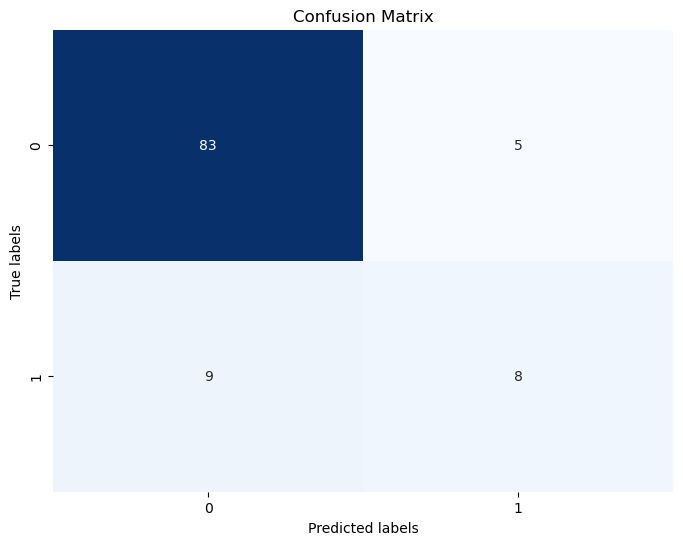

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### NOTE
We used hyperparameter tunning with the RnadomForest model too but the execution took too long for the results obtained that we have decided to omit it for the better execution of the overall code. The parameters on the model are the ones obtained with GridSearch.

### GardientBoosting model testing with hyperparameter tunning

In [23]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

In [24]:
f1_scorer = make_scorer(f1_score)

In [25]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, scoring=f1_scorer)
grid_search_gb.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Precision Score for Gradient Boosting:", grid_search_gb.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Precision Score for Gradient Boosting: 0.37311156186612576


In [26]:
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred_gb)

precision = precision_score(y_test, y_pred_gb)

recall = recall_score(y_test, y_pred_gb)

print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Gradient Boosting Metrics:
Accuracy: 0.8761904761904762
Precision: 0.7
Recall: 0.4117647058823529


The gradient boosting model achieved an accuracy of 87.6%, meaning that 87.6% of its predictions were correct. Its precision was 70%, indicating that 70% of the instances it predicted as positive were indeed positive. However, the recall was 41.2%, meaning the model correctly identified 41.2% of all actual positive cases. This suggests that while the model is generally accurate and fairly precise in its positive predictions, it misses a significant portion of actual positive cases.

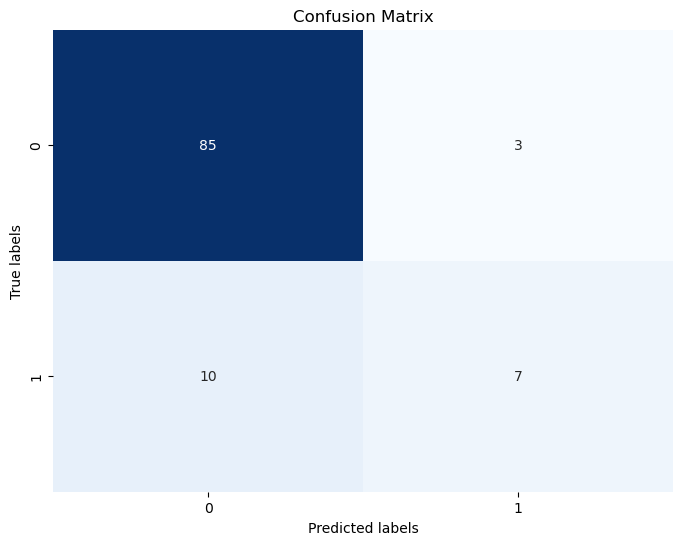

In [28]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model correctly predicted 85 out of 88 instances for class 0 (high accuracy for class 0) but only 7 out of 17 instances for class 1 (lower accuracy for class 1). There are 3 false positives and 10 false negatives, indicating the model is more accurate at identifying class 0 than class 1.

### Linear Model

In [29]:
import warnings

In [30]:
warnings.filterwarnings("ignore")

In [31]:
model = LogisticRegression(max_iter=100)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred_train)

precision = precision_score(y_test, y_pred_train)

recall = recall_score(y_test, y_pred_train)

print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Gradient Boosting Metrics:
Accuracy: 0.8666666666666667
Precision: 0.6
Recall: 0.5294117647058824


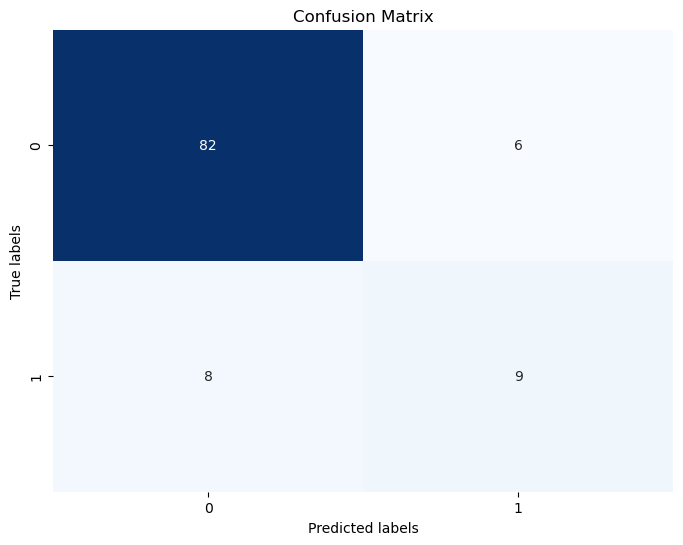

In [33]:
cm_lr = confusion_matrix(y_test, y_pred_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## SELECTION:
We have decided to go with the GardientBoosting model despite not having the best recall out of the three models. The reason to go with GB is that, taking into account the overall idea of the project, as investors we prefer a higher precision not to invest on a company which was predicted to be successful and then fail. The two ther models provide us more TP results but also more FP and we decided that as investors we prefer to be as sure as possible when deciding which company to invest.

# Top 5 best startups to invest in:

In [34]:
predicted_scores = best_gb_model.predict(features_encoded)
predicted_probabilities = best_gb_model.predict_proba(features_encoded)

df['predicted_score'] = predicted_scores
df['predicted_probability'] = predicted_probabilities[:, 1] 

top_5_startups = df.sort_values(by='predicted_probability', ascending=False).head(5)

print(top_5_startups[['name', 'predicted_score', 'predicted_probability']])

                                      name  predicted_score  \
209                        FLUIDLY LIMITED                1   
1198          FUEL 3D TECHNOLOGIES LIMITED                1   
730                        NATURVENTION OY                1   
1171                          NETCYCLER OY                1   
136   ARCIS BIOTECHNOLOGY HOLDINGS LIMITED                1   

      predicted_probability  
209                0.968015  
1198               0.965077  
730                0.960643  
1171               0.957010  
136                0.956584  


These are the startups that our model has predicted to be the ones that have the best chances of being successful. Also, it's printed the probabilites of the startups to have a predicted score of 1, meaning that the 5 startups that we choose are the ones that based on our model, have the highest probabilites of being successful.
Next, we are going to calculate the expected benefeit of investing in them.

# Expected Benefit:

In [44]:
investment_per_company = 1000000
total_investments = 5 * investment_per_company

TP = 7
FP = 3

total_companies = TP + FP
benefit_successful = TP / total_companies * total_investments * 10
benefit_unsuccessful = FP / total_companies * total_investments

total_benefit = benefit_successful - benefit_unsuccessful

print(f"Total Benefit €: {total_benefit}")

Total Benefit €: 33500000.0


The Investment per company is 1,000,000€ and, as mentioned before, we are investing in 5 startups. With our confusion matrix we saw that our model had 7 TP and 3 FP, and we wanted to take that information into account when calculating the expected benefit. In the pdf file that explained the project, it can be seen that every successful stage of a startup makes the value of the invested capital be 10 times higher. With that information we made the calculations to come up with the expected benefit after investing in 5 startups predicted by our model. 
Even if the expected benefit seems too high, it is necessary to bear in mind that if the 5 investments are successful the benefit would be 50,000,000€, therefore it is a reasonable number after the chances of the investment success being mispredicted by the model are taken into account.

## Conclusions

In conclusion, using the gradient boosting model to select the top 5 startups for investment has allowed us to make data-driven decisions with our €5 million capital. The model's performance, reflected in its confusion matrix with 7 true positives and 3 false positives, has been pivotal in estimating our expected benefit. Given that each successful startup multiplies the invested capital by 10, our calculations suggest a substantial potential return. While the projected benefit appears significant, it's justified by the possibility of achieving €50,000,000 if all 5 investments succeed. This approach not only maximizes our chances of high returns but also demonstrates the power of predictive modeling in making informed investment choices.